### Graduate School Project Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from CountryMappings import getCountries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

In [2]:
print(os.listdir())
df_success = pd.read_excel('doc_successful.xlsx')
df_unsuccess = pd.read_excel('doc_unsuccessful.xlsx')

['.ipynb_checkpoints', 'CountryMappings.py', 'doc_successful.xlsx', 'doc_unsuccessful.xlsx', 'Graduate School Project .ipynb', '__pycache__']


## Initial Data Cleaning

### Merging Columns
The two datasets no not have the same columns

In [3]:
print("Successful Data has", len(df_success.columns), "columns")
print("Unsuccessful Data has", len(df_unsuccess.columns), "columns")

print("\nColumns in Successful Data but not in Unsuccessful Data:", list(set(df_success) - set(df_unsuccess)))

print("\nColumns in Unsuccessful Data but not in Successful Data:", list(set(df_unsuccess) - set(df_success)))

Successful Data has 47 columns
Unsuccessful Data has 45 columns

Columns in Successful Data but not in Unsuccessful Data: ['Average Precol GPA', 'AWARD_CATEGORY_DESC', 'Prep Level', 'Time to PhD Degree']

Columns in Unsuccessful Data but not in Successful Data: ['Avg Previous College GPA', 'DEGREE_AWARD_CATEGORY_DESC']


Dealing with "AWARD_CATEGORY_DESC" and "DEGREE_AWARD_CATEGORY_DESC"

In [4]:
print("Number of Unique values in DEGREE_AWARD_CATEGORY_DESC:", df_unsuccess["DEGREE_AWARD_CATEGORY_DESC"].nunique())
print("Unique Value: ", df_unsuccess["DEGREE_AWARD_CATEGORY_DESC"][1])

print("\nNumber of Unique values in AWARD_CATEGORY_DESC:", df_success["AWARD_CATEGORY_DESC"].nunique())
print("Unique Value: ", df_success["AWARD_CATEGORY_DESC"][1])

Number of Unique values in DEGREE_AWARD_CATEGORY_DESC: 1
Unique Value:  Doctoral Degree

Number of Unique values in AWARD_CATEGORY_DESC: 1
Unique Value:  Doctoral Degree


Since this column provides no information, we delete it.

In [5]:
df_success = df_success.drop(columns = "AWARD_CATEGORY_DESC")
df_unsuccess = df_unsuccess.drop(columns = "DEGREE_AWARD_CATEGORY_DESC")

Dealing with "Time to PhD Degree"

In [6]:
df_success["Time to PhD Degree"].head()

0    5.0
1    NaN
2    6.0
3    5.0
4    NaN
Name: Time to PhD Degree, dtype: float64

In [7]:
df_unsuccess["Time to PhD Degree"] = np.nan

QUESTION: How should we deal with this column? For both the missing cases in the Successful Column and the entire Unsuccessful set. 

Dealing with Prep Level - We will add NaN and "absorb it" when we consoladate all previous information with PCA

In [8]:
df_unsuccess["Prep Level"] = np.nan

Dealing with "Average Precol GPA" and "Avg Previous College GPA"

In [9]:
df_unsuccess.rename(columns = {"Avg Previous College GPA" : "Average Precol GPA" }, inplace = True)

Values are the same, column names are different. 

Looking at our two datasets again:

In [10]:
print("Successful Data has", len(df_success.columns), "columns")
print("Unsuccessful Data has", len(df_unsuccess.columns), "columns")

print("\nColumns in Successful Data but not in Unsuccessful Data:", list(set(df_success) - set(df_unsuccess)))

print("\nColumns in Unsuccessful Data but not in Successful Data:", list(set(df_unsuccess) - set(df_success)))

Successful Data has 46 columns
Unsuccessful Data has 46 columns

Columns in Successful Data but not in Unsuccessful Data: []

Columns in Unsuccessful Data but not in Successful Data: []


Adding a response Column Y and Merging the two together: 

In [11]:
df_success['Y'] = 1
df_unsuccess['Y'] = 0
df = pd.concat([df_success, df_unsuccess], ignore_index=True, sort=True)

In [12]:
print("Data Shape: ", df.shape)
print("Number of Positives: ",df[df['Y']==1].shape[0])
print("Number of Negatives: ", df[df['Y']==0].shape[0])

Data Shape:  (2470, 47)
Number of Positives:  1530
Number of Negatives:  940


## Consolidating Columns

#### Race

We will consolidate all information presented in columns CITIZENSHIP_DESC, Intl Nation of Citizenship, American Indian, Asian, Black or African American, White, Hawaiian or Pacific Islander, Hispanic or Latino, Unknown Race Ethnicity together.

In [13]:
print("Values for Citizenship", df["Intl Nation of Citizenship"].nunique())

Values for Citizenship 78


In [14]:
countries = getCountries()
df_temp = df.copy()
for country in df["Intl Nation of Citizenship"].unique():
    try:
        continent = list(filter(lambda c: c['name'] == country, countries))[0]["continent"]
        df["Intl Nation of Citizenship"][df_temp["Intl Nation of Citizenship"] == country] = continent
    except: 
        pass    
print("Values for Citizenship", df["Intl Nation of Citizenship"].nunique())

C:\Users\hzhan\Miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Values for Citizenship 12


In [15]:
print("Values",df["Intl Nation of Citizenship"].unique())
df["Intl Nation of Citizenship"][df["Intl Nation of Citizenship"] == "China"] = "Asia"
df["Intl Nation of Citizenship"][df["Intl Nation of Citizenship"] == "Occupied Palestinian Territory"] = "Asia"
df["Intl Nation of Citizenship"][df["Intl Nation of Citizenship"] == "Korea Republic Of"] = "Asia"
df["Intl Nation of Citizenship"][df["Intl Nation of Citizenship"] == "Cote dIvoire"] = "Afria"
df["Intl Nation of Citizenship"][df["Intl Nation of Citizenship"] == "Oceania"] = "Asia"
df["Intl Nation of Citizenship"][df["Intl Nation of Citizenship"] == "Christmas Island"] = "Asia"
df["Intl Nation of Citizenship"][df["Intl Nation of Citizenship"] == "Netherlands"] = "Europe"
df["Intl Nation of Citizenship"][df["Intl Nation of Citizenship"] == "nan"] = "North America"
print("Values for Citizenship", df["Intl Nation of Citizenship"].nunique())

Values [nan 'Asia' 'China' 'Africa' 'Occupied Palestinian Territory' 'Europe'
 'South America' 'Korea Republic Of' 'Cote dIvoire' 'North America'
 'Oceania' 'Christmas Island' 'Netherlands']
Values for Citizenship 6


C:\Users\hzhan\Miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hzhan\Miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hzhan\Miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [16]:
df["Citizen"] = df["Intl Nation of Citizenship"].copy()
df = df.drop(columns = "Intl Nation of Citizenship")
df = df.drop(columns = "CITIZENSHIP_DESC")

In [17]:
df["Race"] = np.nan
df.Race.fillna(df.Asian, inplace=True)
df.Race.fillna(df["Black or African American"], inplace=True)
df.Race.fillna(df["American Indian"], inplace=True)
df.Race.fillna(df["White"], inplace=True)
df.Race.fillna(df["Hawaiian or Pacific Islander"], inplace=True)
df.Race.fillna(df["Hispanic or Latino"], inplace=True)
df.Race.fillna(df["Unknown Race Ethnicity"], inplace=True)

In [18]:
del df["Black or African American"]
del df["American Indian"]
del df["White"]
del df["Hawaiian or Pacific Islander"]
del df["Hispanic or Latino"]
del df["Unknown Race Ethnicity"]
del df["Asian"]

In [19]:
print(df.shape)

(2470, 40)


### Replacing Nans

In [20]:
print(df.iloc[:,0:4].fillna(0))

      1st Term Funding  2nd Term Funding  3rd Term Funding  4th Term Funding
0               4685.0            4935.0            4110.0             432.0
1                  0.0               0.0               0.0               0.0
2               4685.0            4685.0            3699.0            3699.0
3               4685.0            4685.0            3699.0            3699.0
4              14616.0               0.0               0.0               0.0
...                ...               ...               ...               ...
2465           11325.0           11325.0               0.0               0.0
2466               0.0               0.0               0.0               0.0
2467               0.0               0.0               0.0               0.0
2468           11325.0           11325.0               0.0               0.0
2469               0.0               0.0               0.0               0.0

[2470 rows x 4 columns]


### Use PCA for Application Strength

(2470, 8)


Text(0, 0.5, '% of Variance Explained')

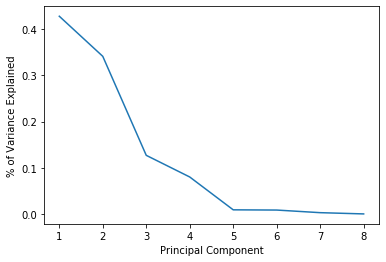

In [21]:
features = ['GMAT Score',
       'GRE Analytical Writing Score', 'GRE Quantitative Score',
       'GRE Revised General Quant Score', 'GRE Revised General Verbal Score',
       'GRE Revised General Write Score', 'GRE Verbal Score','Average Precol GPA']
x = df.loc[:, features].values
x = np.nan_to_num(x) 
x = StandardScaler().fit_transform(x)
pca = PCA()
principalComponents = pca.fit_transform(x)

print(principalComponents.shape)
var = pca.explained_variance_ratio_
plt.plot(range(1,9),var)
plt.xlabel('Principal Component')
plt.ylabel('% of Variance Explained')

We will use first three Components

In [22]:
df["PC1"] = principalComponents[:,0]
df["PC2"] = principalComponents[:,1]
df["PC3"] = principalComponents[:,2]
df = df.drop(columns=features)

In [23]:
print(df.shape)

(2470, 35)


# Summary
-  Started with two data sets with different colummns
-  To make columns same, deleted "Degree" since it only contained a single value, changed the name of 2 columns and added zeros to a column
    -  QUESTION: How to deal with "years to degree" for unsuccessful students? - make it 0 or a large value?
-  Merged the Citizenship column together into a "Regions" field, indicating which continent the student is from.
-  Merged the multiple Race fields into a single column
-  Subbed out NaN's with zeros in columns that made sense. 
-  QUESTION: There is 8 different GPA fields, for up to 8 years of GPA but not all fields are filled. Furthermore, some observations go from GPA -> 0 -> GPA. How to handle.
-  Used PCA to summarize each student's application strength. From Skree Plot, decided to use first three PCs

In [29]:
df["Citizen"]

0        NaN
1        NaN
2        NaN
3        NaN
4       Asia
        ... 
2465     NaN
2466     NaN
2467     NaN
2468    Asia
2469     NaN
Name: Citizen, Length: 2470, dtype: object